In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../..")

In [3]:
import numpy as np

In [4]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent,
    MotionSense_BalancedView20HZ,
    ExtraSensorySense_UnbalancedView20HZ,
    CHARM_BalancedView20Hz,
    WISDM_UnbalancedView20Hz,
    UCIHAR_UnbalancedView20Hz
)

2022-10-25 19:27:21.248098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 19:27:21.248118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# MotionSense Loader
loader = MotionSense_BalancedView20HZ(
    root_dir="../../../data/views/MotionSense/balanced_view_20Hz_with_gravity_9.81_acc_standard", 
    download=False
)

# Print the readme (optional)
loader.print_readme()

# Balanced MotionSense View Resampled to 20Hz with Gravity - Multiplied acc by 9.81m/s²

This is a view from [MotionSense] that was spllited into 3s windows and was resampled to 20Hz using the [FFT method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample). 

The data was first splitted in three sets: train, validation and test. Each one with the following proportions:
- Train: 70% of samples
- Validation: 10% of samples
- Test: 20% of samples

After splits, the datasets were balanced in relation to the activity code column, that is, each subset have the same number of activitiy samples.

**NOTE**: Each subset contain samples from distinct users, that is, samples of one user belongs exclusivelly to one of three subsets.

## Activity codes
- 0: downstairs (569 train, 101 validation, 170 test) 
- 1: upstairs (569 train, 101 validation, 170 test) 
- 2: sitting (569 train, 101 validation, 170 test) 
- 3: standing (569 train, 101 validation, 170 test) 
- 4: walking (569 train, 101 validation, 170 test) 
- 5: jogging (569 train, 101 validation, 170 test) 
 

## Standartized activity codes
- 0: sit (569 train, 101 validation, 170 test) 
- 1: stand (569 train, 101 validation, 170 test) 
- 2: walk (569 train, 101 validation, 170 test) 
- 3: stair up (569 train, 101 validation, 170 test) 
- 4: stair down (569 train, 101 validation, 170 test) 
- 5: run (569 train, 101 validation, 170 test) 
      




In [6]:
# Load the dataset
# If concat_train_validation is true, return a tuple (train+validation, test)
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=4020, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=1020, features=360, no. window=6, label_columns='standard activity code')

In [7]:
train_HD = np.array(train_val[:][0])
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_Y = np.array(test[:][1])

Topologically Regularized DeepAEv2
Using python to compute signatures
DeepAEv2, Input: (1, 360) Inner dim: 10
TO DIVIDE (4020,)
(array([0, 1, 2, 3, 4, 5]), array([670, 670, 670, 670, 670, 670]))
Epoch:1, Loss:25.9194, Loss-ae:24.2203, Loss-topo:0.0170
Epoch:2, Loss:23.8475, Loss-ae:23.3624, Loss-topo:0.0049
Epoch:3, Loss:23.5841, Loss-ae:23.1088, Loss-topo:0.0048
Epoch:4, Loss:24.2938, Loss-ae:23.8188, Loss-topo:0.0047
Epoch:5, Loss:23.5882, Loss-ae:23.2557, Loss-topo:0.0033


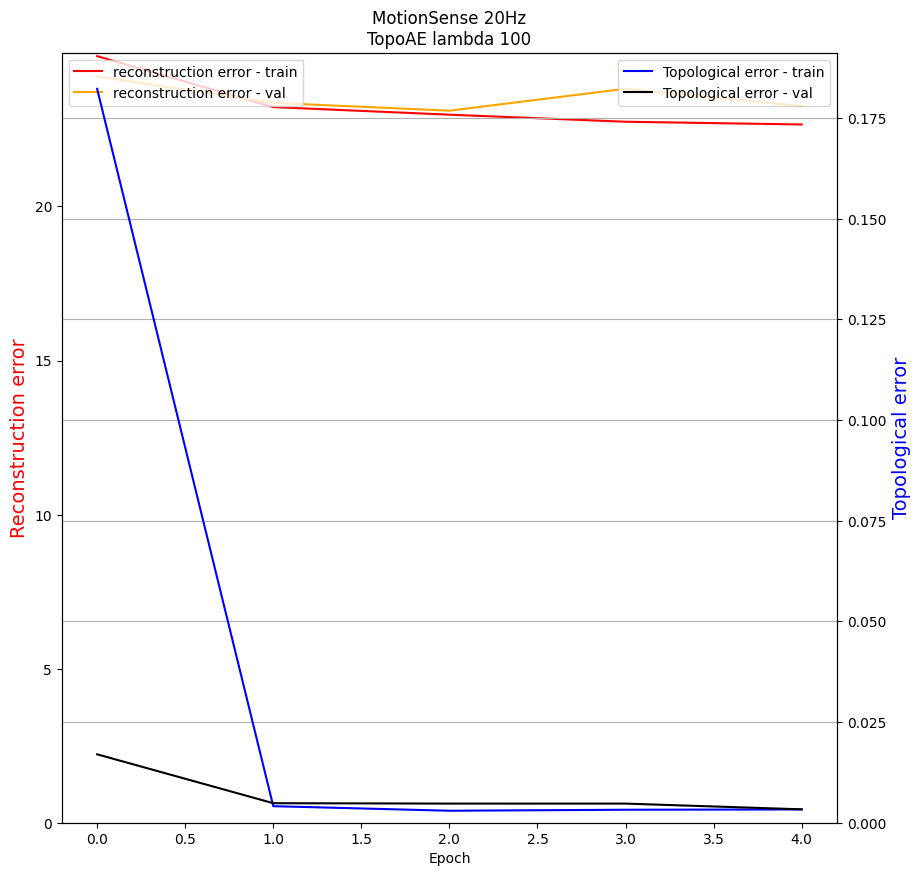

In [34]:
from librep.transforms.topo_ae import TopologicalDimensionalityReduction
from Experiments_topoae_KuHar20Hz_helper import *
dimension_to_test = 10
results = []
for i in range(1):    
    kwargs = {'input_dims':(1,360), 'custom_dim':dimension_to_test}
    input_shape = (-1, 1, 360)
    topoae_lambda = 100
    topo_reducer = TopologicalDimensionalityReduction(
        ae_model='DeepAEv2',
        lam = topoae_lambda,
        ae_kwargs = kwargs,
        input_shape = input_shape,
        patience=10
    )
    title_plot = "MotionSense 20Hz\nTopoAE lambda " + str(topoae_lambda)
    results.append(topo_reducer.fit_for_fixed_epochs(train_HD, train_Y, title_plot=title_plot, write=True, epochs=5))

In [24]:
print(results)

[([24.93999481201172, 23.493938446044922, 24.029279981340682, 23.400569370814733, 23.20456450326102, 23.13755362374442, 23.29435838971819, 22.759514127458846, 22.674288068498885, 23.305125100272043, 22.78860855102539, 22.989876883370535, 23.063655853271484, 23.288997922624862, 22.864377158028738, 22.59132902962821, 22.796010426112584, 22.734675816127233, 23.026333945138113, 22.54678181239537, 22.666093826293945, 22.56475748334612, 22.821388517107284, 22.36535508292062, 22.429120744977677, 23.13536752973284, 22.569623129708425, 22.755496706281388, 22.66340228489467, 23.16325487409319, 22.969221660069056, 22.900456019810267, 22.782723018101283, 23.58791596548898, 23.37883540562221, 23.89301327296666, 22.976000922066824, 22.774111611502512, 22.62276186261858, 23.072875704084122, 22.743822370256698, 22.67270306178502, 23.170837129865372, 22.1717403956822, 22.791937146868026, 22.3477657863072, 22.218334197998047, 22.442127772739955, 22.238114493233816, 22.524239948817662, 22.243440083095006

In [ ]:
assert 1==0

In [ ]:
title_plot = "MotionSense 20Hz\nTopoAE lambda " + str(topoae_lambda)
topo_reducer.fit_for_fixed_epochs(train_HD, train_Y, title_plot=title_plot, epochs=2000)

In [ ]:
assert 1==0

In [ ]:
import numpy as np
def analize_patience(data):
    patience = 0
    p = patience
    max_loss = np.max(data) + 1
    for index in range(1, len(data)):
        print(index, data[index], p)
        if data[index] < max_loss:
            max_loss = data[index]
            p = patience
        else:
            if p == 0:
                print('PATIENCE', patience,' found in index', index, 'with value', data[index])
                patience +=1
                p += 1
            p -= 1

In [ ]:
test_data = [10, 9, 8, 5, 7, 3, 4, 5, 6, 2, 5, 4, 0, 2, 4, 5, 6]
analize_patience(test_data)